Search for the optimal strategy using the Value iteration algorithm.

For testing the policy, 10000 episodes are played.
2 of them are printed out (as coordinates of the trajectory of the car), one episode is played using the rendering provided with the environment.

The actions in the first 10 states are printed out.

In [1]:
# imports

import gymnasium as gym
import time

import value_iteration as v_iter
import decode_taxi as taxi  # decoding and printing states
import play_episode as play # playing episodes

%matplotlib inline

In [2]:
# load the environment.
environment = gym.make('Taxi-v3', render_mode="rgb_array")

Learn the policy.

In [3]:
start = time.time()
policy, pi = v_iter.value_iteration(environment.env)
done = time.time()
elapsed = done - start

Test the policy

In [4]:
%%time

# Number of episodes to play
n_episodes = 10000


print("The policy is represented by a:", type(policy))
# functools.partial
print("---")
print("The first values of this policy are:")
print(pi[:10])
# [4 4 4 4 0 0 0 0 0 0]
# (the same actions each time)

print(f'time = {elapsed:.2f} sec \n\n')  # learning: 0.05 sec.

# Apply best policy to the real environment
# wins, total_reward, average_reward, lst_lst_states = play_episodes(environment, n_episodes, policy)
wins, total_reward, average_reward, lst_lst_states = play.play_episodes(environment, n_episodes, policy)

iteration_name = 'Value Iteration'
print(f'{iteration_name} :: number of wins over {n_episodes} episodes = {wins}')
# 10000 !
print(f'{iteration_name} :: average reward over {n_episodes} episodes = {average_reward}') 
#  +7.9

# print the list of states in the 1st and 2nd episodes.

print("---------")
lst_episode1 = lst_lst_states[0]
print("The 1st episode:")
print(lst_episode1)

# print the coordinates of the car 
print("The trajectory:")
for state in lst_episode1:
    print(taxi.to_str(state))

print("---------")

lst_episode2 = lst_lst_states[1]
print("The 2nd episode:")
print(lst_episode2)


print("The trajectory:")
for state in lst_episode2:
    print(taxi.to_str(state))

print("---------")


The policy is represented by a: <class 'functools.partial'>
---
The first values of this policy are:
[4 4 4 4 0 0 0 0 0 0]
time = 0.04 sec 


Value Iteration :: number of wins over 10000 episodes = 10000
Value Iteration :: average reward over 10000 episodes = 7.959
---------
The 1st episode:
[269, 249, 229, 209, 309, 409, 417, 317, 217, 237, 257, 277, 297, 197, 97, 85]
The trajectory:
(2,3) - passenger: 2 - destination: 1
(2,2) - passenger: 2 - destination: 1
(2,1) - passenger: 2 - destination: 1
(2,0) - passenger: 2 - destination: 1
(3,0) - passenger: 2 - destination: 1
(4,0) - passenger: 2 - destination: 1
(4,0) - passenger: 4 - destination: 1
(3,0) - passenger: 4 - destination: 1
(2,0) - passenger: 4 - destination: 1
(2,1) - passenger: 4 - destination: 1
(2,2) - passenger: 4 - destination: 1
(2,3) - passenger: 4 - destination: 1
(2,4) - passenger: 4 - destination: 1
(1,4) - passenger: 4 - destination: 1
(0,4) - passenger: 4 - destination: 1
(0,4) - passenger: 1 - destination: 1
----

All 10000 episodes were won!

Show one game using the function 'play_one_episode'. The first attempt was adapted from the code of lesson 31.

Well done!
Was the agent successful? True
The total reward for the episode equals: 4
The list of states in this episode: [381, 281, 261, 241, 221, 121, 21, 1, 17, 117, 217, 237, 257, 277, 297, 197, 97, 85]


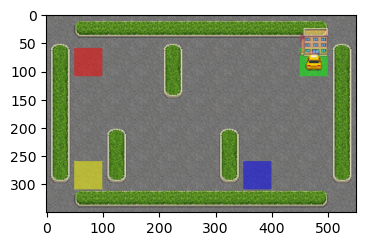

In [5]:

# win, total_reward, lst_states, graph_objects = play_one_episode(environment, policy, show=True)
win, total_reward, lst_states, graph_objects = play.play_one_episode(environment, policy, show=True)
print("Was the agent successful?", win)
print("The total reward for the episode equals:", total_reward)
print("The list of states in this episode:", lst_states)

# The list of states is always of length (20 - total_reward + 2)

All 10000 episodes are won.

The trajectories seem to be the shortest ones. 

The actions in the first 10 states are appropriate and reproduced across runs. Indeed, the first four states correspond to the car and the passenger located in the top left corner, the action 4 (pick up the passenger) is appropriate. The next 6 states again correspond to the car in the top left corner, but the passenger is located elsewhere. In this case, the action 0 (down) is appropriate. 

Fast learning indicates that the algorithm seems to be well-suited to this small environment.